# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat3"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.5623469948768616
Epoch 1, Loss 1.528388500213623
Epoch 2, Loss 1.52558171749115
Epoch 3, Loss 1.5240929126739502
Epoch 4, Loss 1.5270585417747498
Epoch 5, Loss 1.525986909866333
Epoch 6, Loss 1.5088745951652527
Epoch 7, Loss 1.5180346369743347
Epoch 8, Loss 1.51171875
Epoch 9, Loss 1.5008668899536133
Epoch 10, Loss 1.4859638810157776
Epoch 11, Loss 1.5293855667114258
Epoch 12, Loss 1.4873028993606567
Epoch 13, Loss 1.4902966022491455
Epoch 14, Loss 1.456723690032959
Epoch 15, Loss 1.4763026237487793
Epoch 16, Loss 1.4521978497505188
Epoch 17, Loss 1.472464919090271
Epoch 18, Loss 1.453563630580902
Epoch 19, Loss 1.4358859658241272
Epoch 20, Loss 1.434349238872528
Epoch 21, Loss 1.4871137738227844
Epoch 22, Loss 1.4333958625793457
Epoch 23, Loss 1.4565011262893677
Epoch 24, Loss 1.4448246359825134
Epoch 25, Loss 1.4196746349334717
Epoch 26, Loss 1.431993842124939
Epoch 27, Loss 1.4083648324012756
Epoch 28, Loss 1.4276975989341736
Epoch 29, Loss 1.4296091794967651
Epoch 3

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

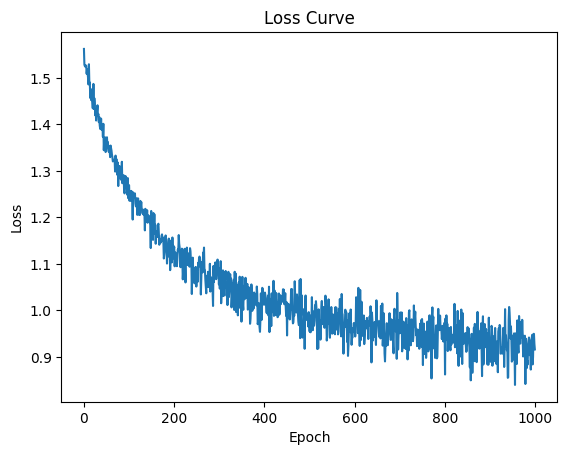

In [5]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 80.0%
Accuracy for class 1 = 33.333333333333336%
Overall accuracy = 62.5%
Accuracy for class 0 = 81.0126582278481%
Accuracy for class 1 = 64.70588235294117%
Overall accuracy = 78.125%


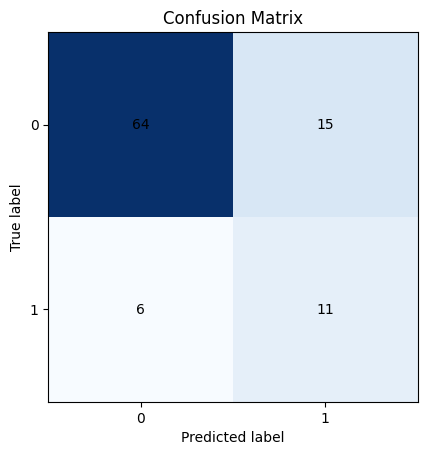

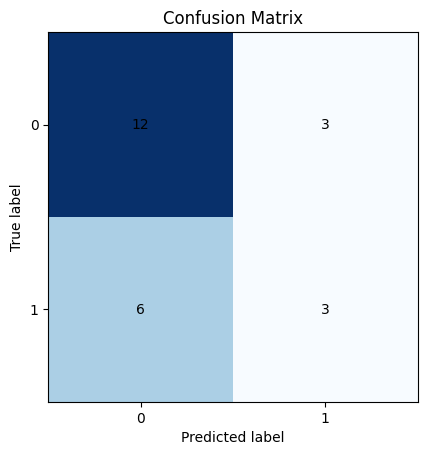

In [6]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

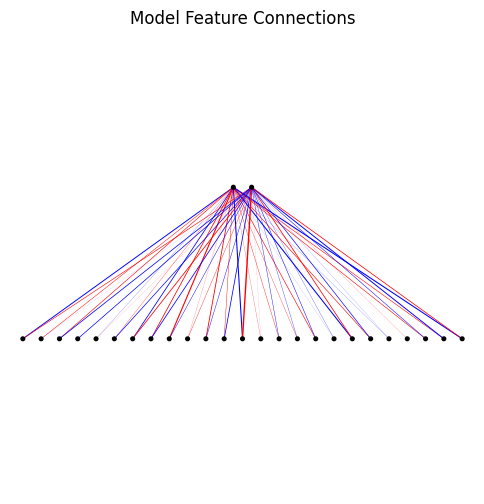

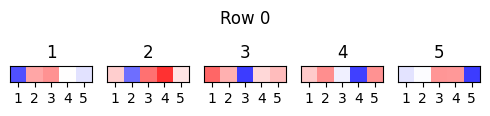

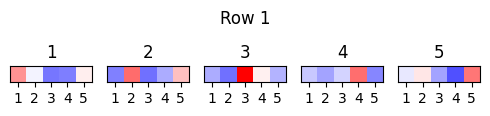

In [7]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)